In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
from astropy.io import ascii
from astropy.table import Table
from tqdm import tqdm
from astropy.convolution import convolve, Gaussian1DKernel, Box1DKernel
import numpy.ma as ma
from sqlalchemy import text
import pandas as pd
import matplotlib.pylab as pl
import matplotlib as mpl
import matplotlib.ticker as mticker
from scipy import stats
import pickle


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
loc = '/Users/allybaldelli/Desktop/AMNH-stuff/Doublet-Quantifiers'
sys.path.append(os.path.abspath(loc))

# Importing scripts needed
from Doublet_Quantifiers.curvefit import *
from Doublet_Quantifiers.models import *

mypath = '/Users/allybaldelli/Desktop/AMNH-stuff/quantifying_clouds_ally'
sys.path.append(os.path.abspath(mypath))

from functions.data_tools import *
from functions.plotting_tools import *

In [3]:

# opening convolved data dictionary 
with open(mypath + "/diamondback-data/pickle_files/t1500_convolve_data_dict.pkl", "rb") as f:
    convolve_data_dict = pickle.load(f)

# opening pseudo-voigt parameter DataFrame
with open(mypath + "/diamondback-data/pickle_files/t1500_parameter_df.pkl", "rb") as f:
    parameter_df = pickle.load(f)

## Plotting

Text(0.5, 0.98, 'P-Voigt Parameters vs. Gravity and Clouds \n T=1500K')

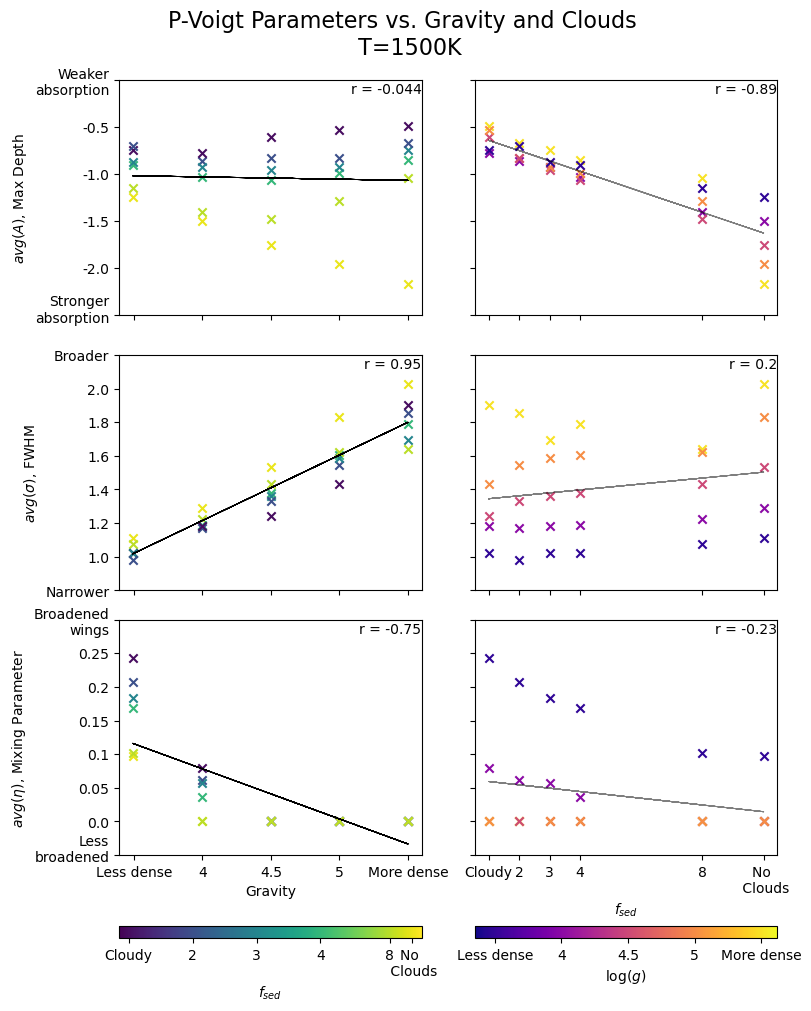

In [4]:
# plotting
lines_TF = False

fig = plt.figure(figsize=(8, 10), constrained_layout=True)

gs = fig.add_gridspec(4, 2, height_ratios=[1, 1, 1, 0.05], width_ratios=[1, 1])

ax = [[fig.add_subplot(gs[i, 0]), fig.add_subplot(gs[i, 1])] for i in range(3)]
########################################################################################
# Plotting each data points
# A
plot_parameter_vs_logg_fsed(ax[0][0], ax[0][1], (parameter_df.A1 + parameter_df.A2)/2,
               parameter_df.logg, parameter_df.clouds, r"$avg(A)$, Max Depth", lines = lines_TF)
# if lines:
#     for grav in logg_values:
#         m, b = np.polyfit(df[parameter_df.logg == grav].clouds.values,
#                           (parameter_df[parameter_df.logg == grav].A1 + parameter_df[parameter_df.logg == grav].A2)/2, 1)
#         ax[0][1].plot(parameter_df.clouds, parameter_df.clouds*m + b, color=logg_colors(norm_g(grav)),
#                       linewidth=.7, alpha=.5)
#     for f in fsed_values:
#         m, b = np.polyfit(parameter_df[parameter_df.clouds == f].logg.values,
#                           (parameter_df[parameter_df.clouds == f].A1 + parameter_df[parameter_df.clouds == f].A2)/2, 1)
#         ax[0][0].plot(parameter_df.logg, parameter_df.logg*m + b, color=fsed_colors(norm_f(f)),
#                       linewidth=.7, alpha=.5)

# FWHM
plot_parameter_vs_logg_fsed(ax[1][0], ax[1][1], (parameter_df.FWHM1 + parameter_df.FWHM2)/2,
               parameter_df.logg, parameter_df.clouds, r"$avg(\sigma)$, FWHM", lines = lines_TF)
# if lines:
#     for grav in logg_values:
#         m, b = np.polyfit(parameter_df[parameter_df.logg == grav].clouds.values,
#                           (parameter_df[parameter_df.logg == grav].FWHM1 + parameter_df[parameter_df.logg == grav].FWHM2)/2, 1)
#         ax[1][1].plot(parameter_df.clouds, parameter_df.clouds*m + b, color=logg_colors(norm_g(grav)),
#                       linewidth=.7, alpha=.5)
#     for f in fsed_values:
#         m, b = np.polyfit(parameter_df[parameter_df.clouds == f].logg.values,
#                           (parameter_df[parameter_df.clouds == f].FWHM1 + parameter_df[parameter_df.clouds == f].FWHM2)/2, 1)
#         ax[1][0].plot(parameter_df.logg, parameter_df.logg*m + b, color=fsed_colors(norm_f(f)),
#                       linewidth=.7, alpha=.5)

# mixing parameter
plot_parameter_vs_logg_fsed(ax[2][0], ax[2][1], (parameter_df.nu1 + parameter_df.nu2)/2,
               parameter_df.logg, parameter_df.clouds, r"$avg(η)$, Mixing Parameter", lines = lines_TF)
# if lines:
#     for grav in logg_values:
#         m, b = np.polyfit(parameter_df[parameter_df.logg == grav].clouds.values,
#                           (parameter_df[parameter_df.logg == grav].nu1 + parameter_df[parameter_df.logg == grav].nu2)/2, 1)
#         ax[2][1].plot(parameter_df.clouds, parameter_df.clouds*m + b, color=logg_colors(norm_g(grav)),
#                       linewidth=.7, alpha=.5)
#     for f in fsed_values:
#         m, b = np.polyfit(parameter_df[parameter_df.clouds == f].logg.values,
#                           (parameter_df[parameter_df.clouds == f].nu1 + parameter_df[parameter_df.clouds == f].nu2)/2, 1)
#         ax[2][0].plot(parameter_df.logg, parameter_df.logg*m + b, color=fsed_colors(norm_f(f)),
#                       linewidth=.7, alpha=.5)

########################################################################################
# labels along the bottom
ax[2][0].set_xlabel("Gravity")
ax[2][0].set_xticklabels(logg_ticks)

ax[2][1].set_xlabel(r"$f_{sed}$")
ax[2][1].set_xticklabels(fsed_ticks)

########################################################################################
# labels along y axis
# Max depth
yticks = ax[0][0].get_yticks()
ylabel = list(yticks.copy()/1e11)
ylabel[0] = "Stronger\nabsorption\n"
ylabel[-1] = "Weaker\nabsorption"
ax[0][0].set_yticks(yticks)
ax[0][0].set_yticklabels(ylabel)
ax[0][1].set_yticks(yticks)
ax[0][1].set_yticklabels([None for i in ylabel])

# FWHM
yticks = ax[1][0].get_yticks()
ylabel = list(np.around(yticks.copy()/1e-3, 1))
ylabel[-1] = "Broader"
ylabel[0] = "Narrower"
ax[1][0].set_yticks(yticks)
ax[1][0].set_yticklabels(ylabel)
ax[1][1].set_yticks(yticks)
ax[1][1].set_yticklabels([None for i in ylabel])

# Mixing parameter
yticks = ax[2][1].get_yticks()
ylabel = list(np.around(yticks.copy(), 2))
ylabel[0] = "Less\nbroadened\n"
ylabel[-1] = "Broadened\nwings"
ax[2][0].set_yticks(yticks)
ax[2][0].set_yticklabels(ylabel)
ax[2][1].set_yticks(yticks)
ax[2][1].set_yticklabels([None for i in ylabel])


########################################################################################
# Colorbar
cax1 = fig.add_subplot(gs[3, 1])
axcb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_g, cmap=logg_colors),
                    ticks=logg_num,
                    format=mticker.FixedFormatter(logg_ticks),
                    cax=cax1, orientation='horizontal')
# , shrink=1, aspect=50)
axcb.set_label(r'$\log(g)$', fontsize=10)  # empty label


cax1 = fig.add_subplot(gs[3, 0])
axcb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_f, cmap=fsed_colors),
                    ticks=fsed_num,
                    format=mticker.FixedFormatter(fsed_ticks), cax=cax1,
                    orientation='horizontal')
# , shrink=1, aspect=50)
axcb.set_label(r'$f_{sed}$', fontsize=10)   # empty label


fig.suptitle(
    'P-Voigt Parameters vs. Gravity and Clouds \n T=1500K', fontsize=16)
# plt.tight_layout()

Text(0.5, 0.98, 'P-Voigt Parameters vs. Gravity and Clouds')

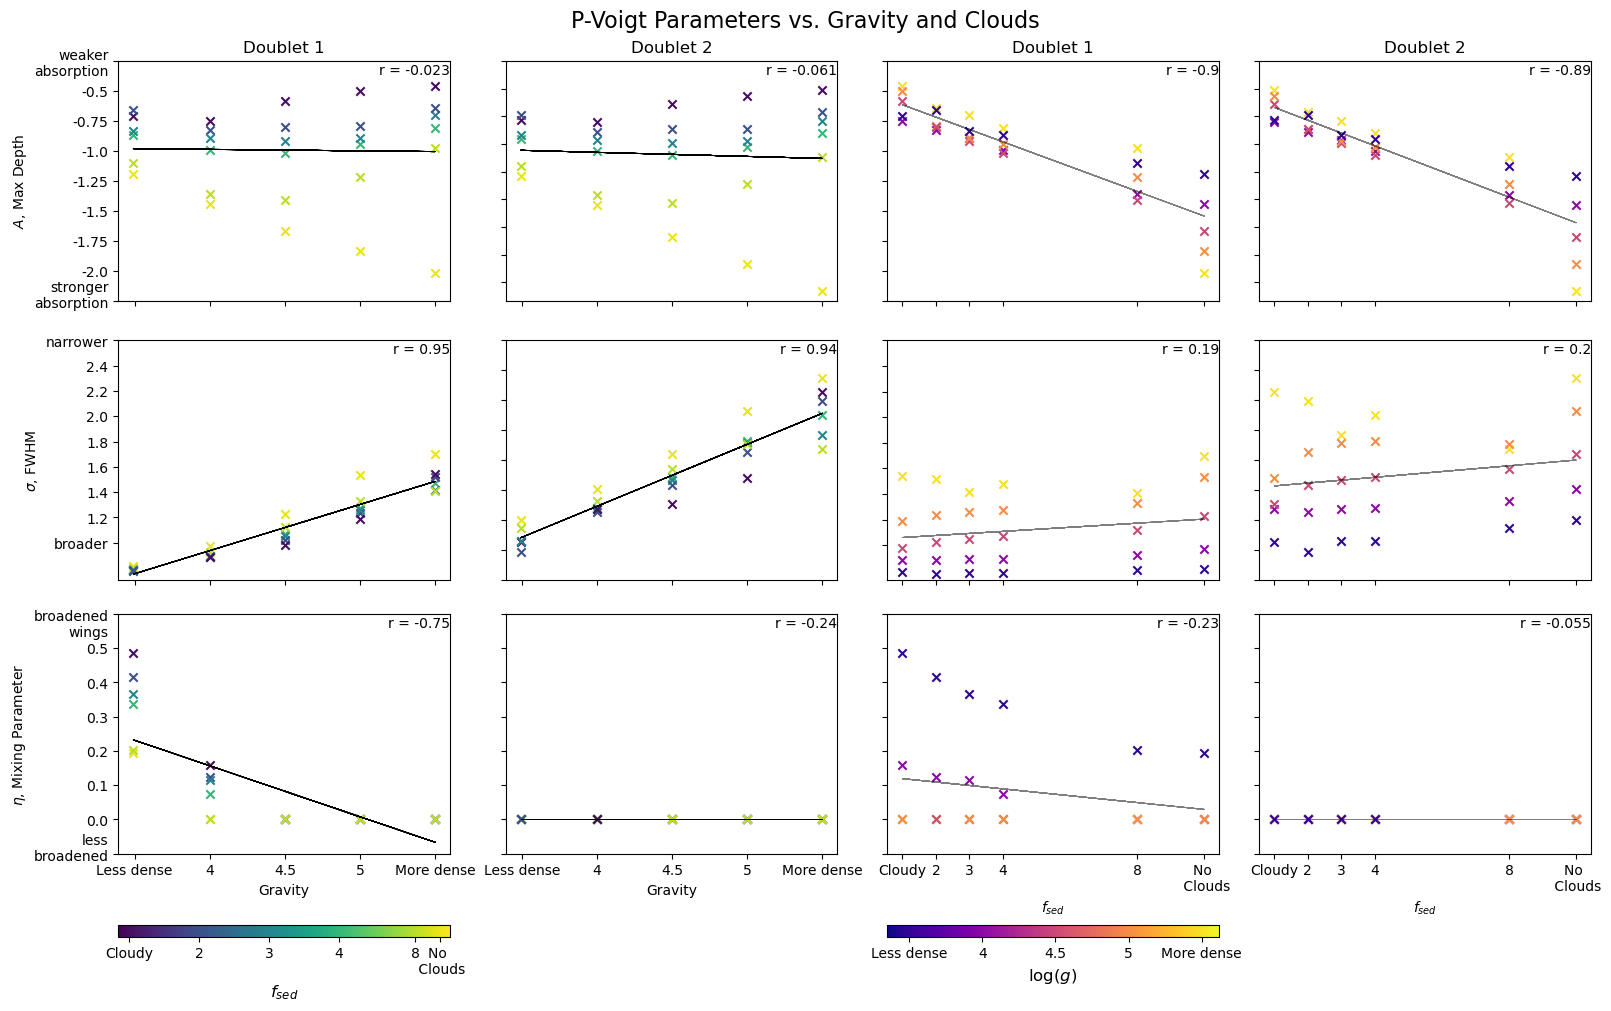

In [5]:
# plotting each doublet separately
lines_TF = False

fig = plt.figure(figsize=(16, 10), constrained_layout=True)

gs = fig.add_gridspec(4, 4, height_ratios=[
                      1, 1, 1, 0.05], width_ratios=[1, 1, 1, 1])

ax = [[fig.add_subplot(gs[i, 0]), fig.add_subplot(gs[i, 1]), fig.add_subplot(
    gs[i, 2]), fig.add_subplot(gs[i, 3])] for i in range(3)]
########################################################################################
# Plotting each data points
# A
# doublet 1
plot_parameter_vs_logg_fsed(ax[0][0], ax[0][2], parameter_df.A1,
               parameter_df.logg, parameter_df.clouds, r"$A$, Max Depth", lines = lines_TF)

# doublet 2
plot_parameter_vs_logg_fsed(ax[0][1], ax[0][3], parameter_df.A2,
               parameter_df.logg, parameter_df.clouds, r"", lines = lines_TF)


# FWHM
# doublet 1
plot_parameter_vs_logg_fsed(ax[1][0], ax[1][2], parameter_df.FWHM1,
               parameter_df.logg, parameter_df.clouds, r"$\sigma$, FWHM", lines = lines_TF)

# doublet 2
plot_parameter_vs_logg_fsed(ax[1][1], ax[1][3], parameter_df.FWHM2,
               parameter_df.logg, parameter_df.clouds, r"", lines = lines_TF)


# mixing parameter
# doublet 1
plot_parameter_vs_logg_fsed(ax[2][0], ax[2][2], parameter_df.nu1,
               parameter_df.logg, parameter_df.clouds, r"$η$, Mixing Parameter", lines = lines_TF)

# doublet 2
plot_parameter_vs_logg_fsed(ax[2][1], ax[2][3], parameter_df.nu2,
               parameter_df.logg, parameter_df.clouds, r"", lines = lines_TF)


########################################################################################
# labels along the bottom
ax[2][0].set_xlabel("Gravity")
ax[2][0].set_xticklabels(logg_ticks)
ax[2][1].set_xlabel("Gravity")
ax[2][1].set_xticklabels(logg_ticks)

ax[2][2].set_xlabel(r"$f_{sed}$")
ax[2][2].set_xticklabels(fsed_ticks)
ax[2][3].set_xlabel(r"$f_{sed}$")
ax[2][3].set_xticklabels(fsed_ticks)

########################################################################################
# labels along y axis # need to fix power
# Max depth
yticks = ax[0][0].get_yticks()
ylabel = list(yticks.copy()/1e11)
ylabel[0] = "stronger\nabsorption\n"
ylabel[-1] = "weaker\nabsorption"
ax[0][0].set_yticks(yticks)
ax[0][0].set_yticklabels(ylabel)
ax[0][1].set_yticks(yticks)  # setting ticks to none for the rest of the rows
ax[0][1].set_yticklabels([None for i in ylabel])
ax[0][2].set_yticks(yticks)
ax[0][2].set_yticklabels([None for i in ylabel])
ax[0][3].set_yticks(yticks)
ax[0][3].set_yticklabels([None for i in ylabel])

# FWHM
yticks = ax[1][1].get_yticks()
ylabel = list(np.around(yticks.copy()/1e-3, 1))
ylabel[0] = "broader"
ylabel[-1] = "narrower"
ax[1][0].set_yticks(yticks)
ax[1][0].set_yticklabels(ylabel)
ax[1][1].set_yticks(yticks)  # setting ticks to none for the rest of the rows
ax[1][1].set_yticklabels([None for i in ylabel])
ax[1][2].set_yticks(yticks)
ax[1][2].set_yticklabels([None for i in ylabel])
ax[1][3].set_yticks(yticks)
ax[1][3].set_yticklabels([None for i in ylabel])

# Mixing parameter
yticks = ax[2][0].get_yticks()
ylabel = list(np.around(yticks.copy(), 2))
ylabel[0] = "less\nbroadened\n"
ylabel[-1] = "\nbroadened\nwings"
ax[2][0].set_yticks(yticks)
ax[2][0].set_yticklabels(ylabel)
ax[2][1].set_yticks(yticks)  # setting ticks to none for the rest of the rows
ax[2][1].set_yticklabels([None for i in ylabel])
ax[2][2].set_yticks(yticks)
ax[2][2].set_yticklabels([None for i in ylabel])
ax[2][3].set_yticks(yticks)
ax[2][3].set_yticklabels([None for i in ylabel])


########################################################################################
# Colorbar
cax1 = fig.add_subplot(gs[3, 2])
axcb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_g, cmap=logg_colors),
                    ticks=logg_num,
                    format=mticker.FixedFormatter(logg_ticks),
                    cax=cax1, orientation='horizontal')
# , shrink=1, aspect=50)
axcb.set_label(r'$\log(g)$', fontsize=12)  # empty label


cax1 = fig.add_subplot(gs[3, 0])
axcb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_f, cmap=fsed_colors),
                    ticks=fsed_num,
                    format=mticker.FixedFormatter(fsed_ticks), cax=cax1,
                    orientation='horizontal')
# , shrink=1, aspect=50)
axcb.set_label(r'$f_{sed}$', fontsize=12)   # empty label

########################################################################################
# setting titles
# set doublet title
ax[0][0].set_title("Doublet 1")
ax[0][1].set_title("Doublet 2")
ax[0][2].set_title("Doublet 1")
ax[0][3].set_title("Doublet 2")
# figure title
fig.suptitle('P-Voigt Parameters vs. Gravity and Clouds', fontsize=16)

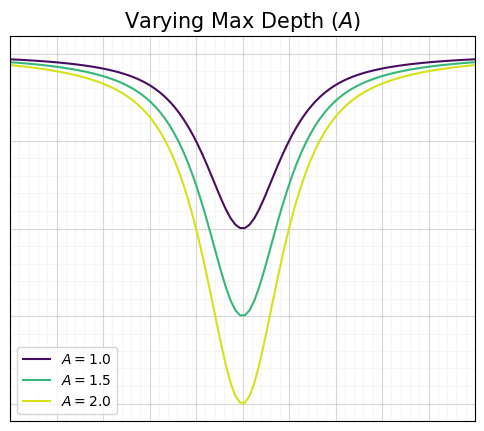

In [6]:
x = np.linspace(-5, 5, 100)
y1 = pseudo_voigts(x, nu=0.1, A=-1, FWHM=1, mu=0)
y15 = pseudo_voigts(x, nu=0.1, A=-1.5, FWHM=1, mu=0)
y2 = pseudo_voigts(x, nu=0.1, A=-2, FWHM=1, mu=0)

fig, ax = plt.subplots(figsize=(6, 5))

ax.plot(x, y1, color=fsed_colors(norm_f(1)), label=r"$A = 1.0$")
ax.plot(x, y15, color=fsed_colors(norm_f(4)), label=r"$A = 1.5$")
ax.plot(x, y2, color=fsed_colors(norm_f(9)), label=r"$A = 2.0$")

ax.set_title(r"Varying Max Depth ($A$)", fontsize=15,
             color='k')


# setting ticks and limits
ax.set_xticks(ticks=[n for n in range(-5, 6)])
ax.set_yticks([n*0.5 for n in range(-5, 1)])
ax.set_xticklabels(['' for n in range(-5, 6)])
ax.set_yticklabels(['' for n in range(-5, 1)])
ax.tick_params(which='major', length=5, width=0,
               direction='in', top=True, right=True)
ax.tick_params(which='minor', length=2, width=0,
               direction='in', top=True, right=True)
ax.set_xlim(-5, 5)
ax.set_ylim(-2.1, .1)

# grid lines
ax.minorticks_on()
ax.grid(visible=True, which='major', alpha=.5)
ax.grid(visible=True, which='minor', alpha=.1)
plt.legend()

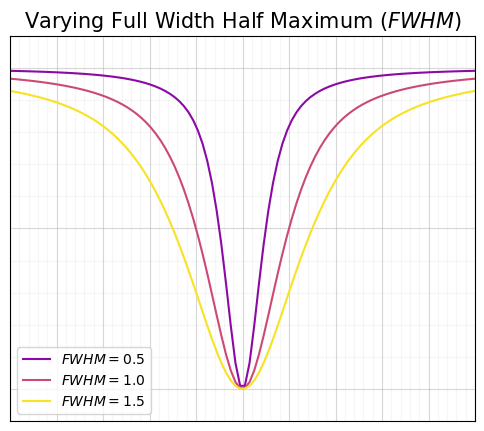

In [7]:
x = np.linspace(-5, 5, 100)
y1 = pseudo_voigts(x, nu=0.1, A=-1, FWHM=0.5, mu=0)
y15 = pseudo_voigts(x, nu=0.1, A=-1, FWHM=1, mu=0)
y2 = pseudo_voigts(x, nu=0.1, A=-1, FWHM=1.5, mu=0)

fig, ax = plt.subplots(figsize=(6, 5))

ax.plot(x, y1, color=logg_colors(norm_g(4)), label=r"$FWHM = 0.5$")
ax.plot(x, y15, color=logg_colors(norm_g(4.5)), label=r"$FWHM = 1.0$")
ax.plot(x, y2, color=logg_colors(norm_g(5.5)), label=r"$FWHM = 1.5$")

ax.set_title(r"Varying Full Width Half Maximum ($FWHM$)", fontsize=15,
             color='k')


# setting ticks and limits
ax.set_xticks(ticks=[n for n in range(-5, 6)])
ax.set_yticks([n*0.5 for n in range(-5, 1)])
ax.set_xticklabels(['' for n in range(-5, 6)])
ax.set_yticklabels(['' for n in range(-5, 1)])
ax.tick_params(which='major', length=5, width=0,
               direction='in', top=True, right=True)
ax.tick_params(which='minor', length=2, width=0,
               direction='in', top=True, right=True)
ax.set_xlim(-5, 5)
ax.set_ylim(-1.1, .1)

# grid lines
ax.minorticks_on()
ax.grid(visible=True, which='major', alpha=.5)
ax.grid(visible=True, which='minor', alpha=.1)
plt.legend()